In [257]:
from scipy.special import softmax

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#                                           Theory
```js
        The almost completed theory and process of "Softmax Regression" / "Multinomial Logistic Regression using Gradient Descent and Softmax Function" is written in "4. Softmax Regression using Softmax function (Final Version of Logistic Regression).pdf" inside Theory folder.

        Here we will see how Multi Classification is detected. So we can take any number of input columns, any number of classifications.
```

#                                   Categorical Column to Numerical Column.
```js
        For classification tasks we must convert our Output Str/Categorical column into Numerical column.
```

In [182]:
df = ( sns.load_dataset('iris')
      .iloc[:, [0, 2, -1]]
      .assign(species = lambda df1: df1['species'].astype('category'))
     )

#                  Setting which category of 'species' belongs to which Numerical Category.

df1 = ( pd.DataFrame({'categorial' : df['species'], # dtype as same as df['species'], category.
                      'numerical'  : df['species'].cat.codes}) # dtype = int8.
       .drop_duplicates(subset = ['numerical'])
       .reset_index().drop(columns='index') # Now index column and numerical column has same values.
      )

print(df1)

   categorial  numerical
0      setosa          0
1  versicolor          1
2   virginica          2


#                                           The dataset we will use.

In [ ]:
df2 = ( sns.load_dataset('iris')
       .iloc[:, [0, 2, -1]]
       .assign(species = lambda df1: df1['species'].astype('category'))
       .assign(species = lambda df2: df2['species'].cat.codes) # Which species belongs to which number? See above Output.
      )

print(f"{df2.head(5)} \n\n{df2.dtypes}")

dataset_explanation = """
Why we took just 2 input columns? Because ultimately we want to create Boundary Lines over our dataset(see "species.png") which
separates Setosa, Versicolor and Virginica. And taking 2D Input Dataset its easier to plot.
"""

   sepal_length  petal_length  species
0           5.1           1.4        0
1           4.9           1.4        0
2           4.7           1.3        0
3           4.6           1.5        0
4           5.0           1.4        0 

sepal_length    float64
petal_length    float64
species            int8
dtype: object


#                                   Split the Dataset, Train the Model and do Prediction.

In [244]:
X, y = df2.iloc[:, :2], df2.iloc[:, -1] # [sepal_length, petal_length], [species].
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # (120, 2), (30, 2), (120), (30).

lr = LogisticRegression()
lr.fit(X = x_train, y = y_train)

# For Multi-classification : Coefficient numbers = Number of Input Columns * Number of unique values in 'output' column.
print(f"Coefficients = \n{lr.coef_}.")
"""
Coefficients = 
[[-0.21008149 -2.92359787]         [[w1, w2],  -> For Setosa.             
 [ 0.34717809 -0.35033387]   =>     [w1, w2],  -> For versicolor.   =>    Why only w1 and w2? Because we've 2 Input columns.
 [-0.13709661  3.27393174]]         [w1, w2]]  -> For virginica.
"""

print(f"\nIntercept = \n{lr.intercept_}.")
"""
Intercept = (w0)
[ 11.42312524   1.60537323 -13.02849847]   => w0 for Setosa, w0 for versicolor and w0 for virginica.
"""

print(f"\nFor x_test.iloc[0], the prediction = {lr.predict_proba(X = x_test[:1])}.")
"""
                        sepal_length    petal_length
    x_test.iloc[0] =         4.6            1.4

    lr.predict_proba(X = x_test[:1]) = [ 9.74711228e-01, 2.52885799e-02, 1.92154549e-07 ]
                                         ----Setosa----  --versicolor--  --virginica---
    
    predict_proba() returns prediction for all the classes. We can see Setosa has highest probability.
    predict() returns directly the class which has the most probability.
"""

predict_class = lr.predict(X = x_test[:1])[0] # lr.predict(X = x_test[:1]) returns [0].
print(f"\nFor x_test.iloc[0], the prediction = {df1.iloc[predict_class, 0]}.")

Coefficients = 
[[-0.21008149 -2.92359787]
 [ 0.34717809 -0.35033387]
 [-0.13709661  3.27393174]].

Intercept = 
[ 11.42312524   1.60537323 -13.02849847].

For x_test.iloc[0], the prediction = [[9.74711228e-01 2.52885799e-02 1.92154549e-07]].

For x_test.iloc[0], the prediction = setosa.


#                                           Classification report, Confusion Matrix.

Accuracy score = 0.9666666666666667.

Classification Report :
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



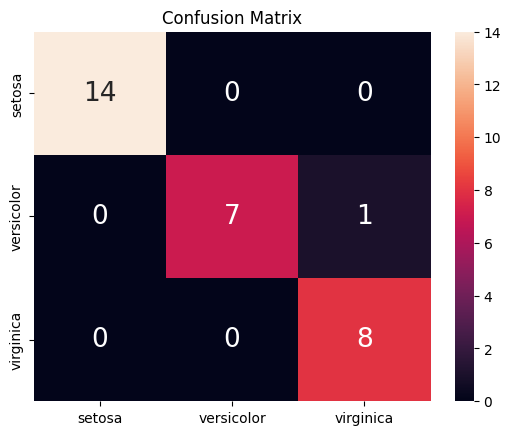

In [260]:
y_pred = lr.predict(X = x_test) # [0, 0, 2 .....].

print(f"Accuracy score = {accuracy_score(y_true = y_test, y_pred = y_pred)}.")

print("\nClassification Report :\n----------------------")
print(classification_report(y_true = y_test, y_pred = y_pred))

confu_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
confu_mat_df = pd.DataFrame(data = {'setosa'     : confu_mat[:, 0],
                                    'versicolor' : confu_mat[:, 1],
                                    'virginica'  : confu_mat[:, 2]},
                           index = ['setosa', 'versicolor', 'virginica'])

ax = sns.heatmap(confu_mat_df, annot = True, annot_kws = {'fontsize' : 19})
ax.set_title("Confusion Matrix")
plt.show()

#                                                   Creating Boundary Lines

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


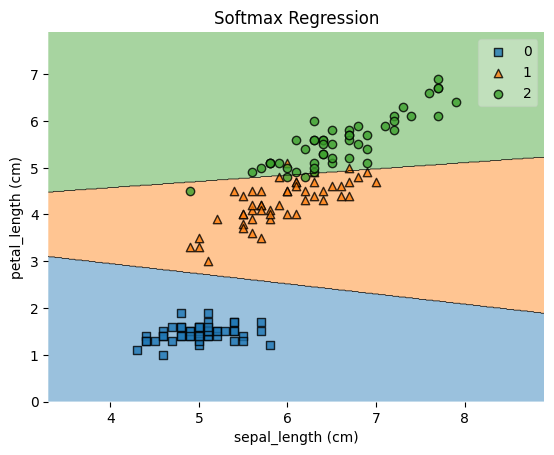

In [ ]:
from mlxtend.plotting import plot_decision_regions

ax1 = plot_decision_regions(X = X.values, y = y.values, clf = lr) # clf = model.

ax1.set_title("Softmax Regression")
ax1.set_xlabel("sepal_length (cm)")
ax1.set_ylabel("petal_length (cm)")
plt.show()

warning_explanation = """
The warning we are seeing = X does not have valid feature names, but LogisticRegression was fitted with feature names.
We've fed our LogisticRegression model, lr, a dataframe where X had "column name" but here we've given numpy array because
only numpy array is acceptable here. Not our fault!

Also why X = X.values, y = y.values? Because we want to create Boundary Line over our dataset(see "species.png")
"""